# Predicting the Location of a Hosptial based on Covid Cases

### Project description 

For this project we (Cecilia McCormick and Varsha Subramanyam) wanted to see if we could use some of the new tools we learned in 16A for data visualization and predictive modeling on an existing health dataset. We were curious to see if we could make predictions about a dataset by choosing certain variables and examining the differences between different types of models. In particular, we wanted to know if we could use number of covid cases in different parts of the hospital (ie in the ICU, Emergency room, etc) to predict the state (One of the 50 United States) that the hospital is located in.

We also thought that it would be helpful to make a custom class which contains methods for visualizing data given in the csv format. By importing this class from a single file in the same notebook, we are able to visualize data in a single line of code instead of using many lines in writing the matplotlib functions. 


Since we are both biology majors, we thought it might be interesting to take a look at health data. We are especially interested in COVID data because there so much available and there are incredibly interesting applications of this type of data. 

In [3]:
# Begin by importing all of the packages that we will need for this analysis 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## The Data

The dataset that we will be using is the HealthData.gov public access database made by the United States government. The data can be accessed in its original form using the following link: https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/uqq2-txqb/data 

Here we assume that the data is in the same folder as the juypter notebook and we will use this directory for our work. 

The database was first released in June of 2020 and has been added to up until now. There is information about more than 600,000 hospitals and the number of covid cases that they had during a particular week. The cases are also separated into the subgroups of patients and employees. There is also locational data about the hospital including the state, city, and zip code.


In [4]:
# Read in the data that we will be working with and take a look at it in the original format 
hospital = pd.read_csv("COVID_data.csv")
hospital.head() 

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_confirmed_unknown_7_day_sum,staffed_icu_pediatric_patients_confirmed_covid_7_day_avg,staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage,staffed_icu_pediatric_patients_confirmed_covid_7_day_sum,staffed_pediatric_icu_bed_occupancy_7_day_avg,staffed_pediatric_icu_bed_occupancy_7_day_coverage,staffed_pediatric_icu_bed_occupancy_7_day_sum,total_staffed_pediatric_icu_beds_7_day_avg,total_staffed_pediatric_icu_beds_7_day_coverage,total_staffed_pediatric_icu_beds_7_day_sum
0,aab2bb3ab769da90baf57242c96ec481afb5ec6a233784...,2022/11/18,LA,NaN,Crescent City Surgical Centre,NaN,NaN,70118.0,Short Term,NaN,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
1,640001,2022/11/18,AS,640001,LBJ TROPICAL MEDICAL CENTER,"FAGAALU VILLAGE, P O BOX LBJ",PAGO PAGO,96799.0,Short Term,NaN,...,0.0,0.0,5,0.0,0.0,5,0.0,0.0,5,0.0
2,3b081d5ef1c552538e4af4aa593a857bb922a4f364a412...,2022/11/18,LA,NaN,Surgery Center of Zachary,NaN,NaN,70791.0,Short Term,NaN,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
3,ee04edd185865c38c839812cb2eb5ae5d3f8922e3b629e...,2022/11/18,LA,NaN,Alexandria Emergency Hospital,5900 Coliseum Blvd,Alexandria,71303.0,Short Term,NaN,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
4,010108,2022/11/18,AL,010108,PRATTVILLE BAPTIST HOSPITAL,124 S MEMORIAL DR,PRATTVILLE,36067.0,Short Term,1001.0,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0


In [5]:
# Before we trim down the rows and columns that will not be useful to us, lets check the total size by using the shape function
print(hospital.shape)

# The dataset we are using has 604,660 hospitals with 127 features (columns) for each one 
# Features represent variables for each hospital including the state, number of ICU covid cases that week, etc.

(604660, 127)


## Visualizing the Data

In order to visualize the makeup of the data, we will use the custom class we created in the Visualizer.py file. This class allows us to make beautiful graphs and useful statistical summaries with single lines of code, rather than implementing work with matplot on our own

In [6]:
# Import the py document containing our class definition and make an instance of the Hospital class 
from Visualizer import Hospital
covid_data = Hospital(hospital)

print(type(covid_data))

<class 'Visualizer.Hospital'>


In [7]:
# As a sanity check, lets make sure that the length function we created in 
## the custom class returns the same number of hospitals as the head function in pandas 

print(len(covid_data))

# Here the length agrees with the number that we got when we used the head function

# This is another way for a person to get the length of their data 

604660


In [8]:
# Now lets use the functions from the custom class to find some basic summary statistics for the dataset 

covid_data.summary(["state","total_staffed_pediatric_icu_beds_7_day_coverage"], "state")


total_staffed_pediatric_icu_beds_7_day_coverage                      \
                                                count      mean       std   
state                                                                       
AK                                             1708.0  6.527518  1.684504   
AL                                            11695.0  2.672168  3.383668   
AR                                            10368.0  6.720583  1.223525   
AS                                               66.0  6.515152  1.647772   
AZ                                             8972.0  5.960878  2.314510   
CA                                            42731.0  6.768318  0.932779   
CO                                            10860.0  6.408564  1.810840   
CT                                             3840.0  6.825521  0.888862   
DC                                             1210.0  4.232231  3.289422   
DE                                              959.0  6.719499  1.283241   
FL                                            24870.0  6.356172  1.949491   
GA                                            17239.0  4.380997  3.273736   
GU                                              242.0  6.289256  2.061052   
HI                                             2911.0  5.808313  2.454748   
IA                                            14072.0  3.646106  3.450222   
ID                                             5440.0  5.588787  2.554323   
IL                                            21656.0  6.619874  1.452024   
IN                                            14986.0  4.363606  3.205077   
KS                                            16280.0  6.566339  1.551863   
KY                                            11857.0  2.946782  3.420628   
LA                                            17617.0  2.508429  3.343838   
MA                                             8788.0  3.259786  3.454461   
MD                                             5944.0  6.839838  0.920308   
ME                                             3977.0  6.261755  2.029493   
MI                                            17140.0  4.857410  3.112676   
MN                                            15243.0  6.722168  1.227885   
MO                                            13885.0  6.788333  1.085608   
MP                                              101.0  5.683168  2.553158   
MS                                            11875.0  6.689095  1.323787   
MT                                             7189.0  4.379330  3.053743   
NC                                            13373.0  3.888507  3.313340   
ND                                             5435.0  3.020791  3.299174   
NE                                            11287.0  3.154071  3.354334   
NH                                             3146.0  5.349650  2.884826   
NJ                                             8800.0  3.950000  3.407105   
NM                                             4737.0  4.440785  3.022915   
NV                                             5197.0  2.516837  3.328377   
NY                                            19741.0  6.723672  1.253074   
OH                                            21956.0  4.948670  3.096689   
OK                                            14717.0  5.309982  2.773499   
OR                                             7234.0  6.084462  2.170316   
PA                                            21300.0  6.599061  1.444531   
PR                                             6656.0  4.480919  3.207092   
RI                                             1314.0  6.011416  2.224086   
SC                                             7867.0  6.828016  0.952622   
SD                                             6859.0  6.642659  1.417363   
TN                                            13040.0  3.182669  3.447356   
TX                                            54079.0  4.328094  3.343727   
UT                                             6037.0  6.686102  1.346901   
VA

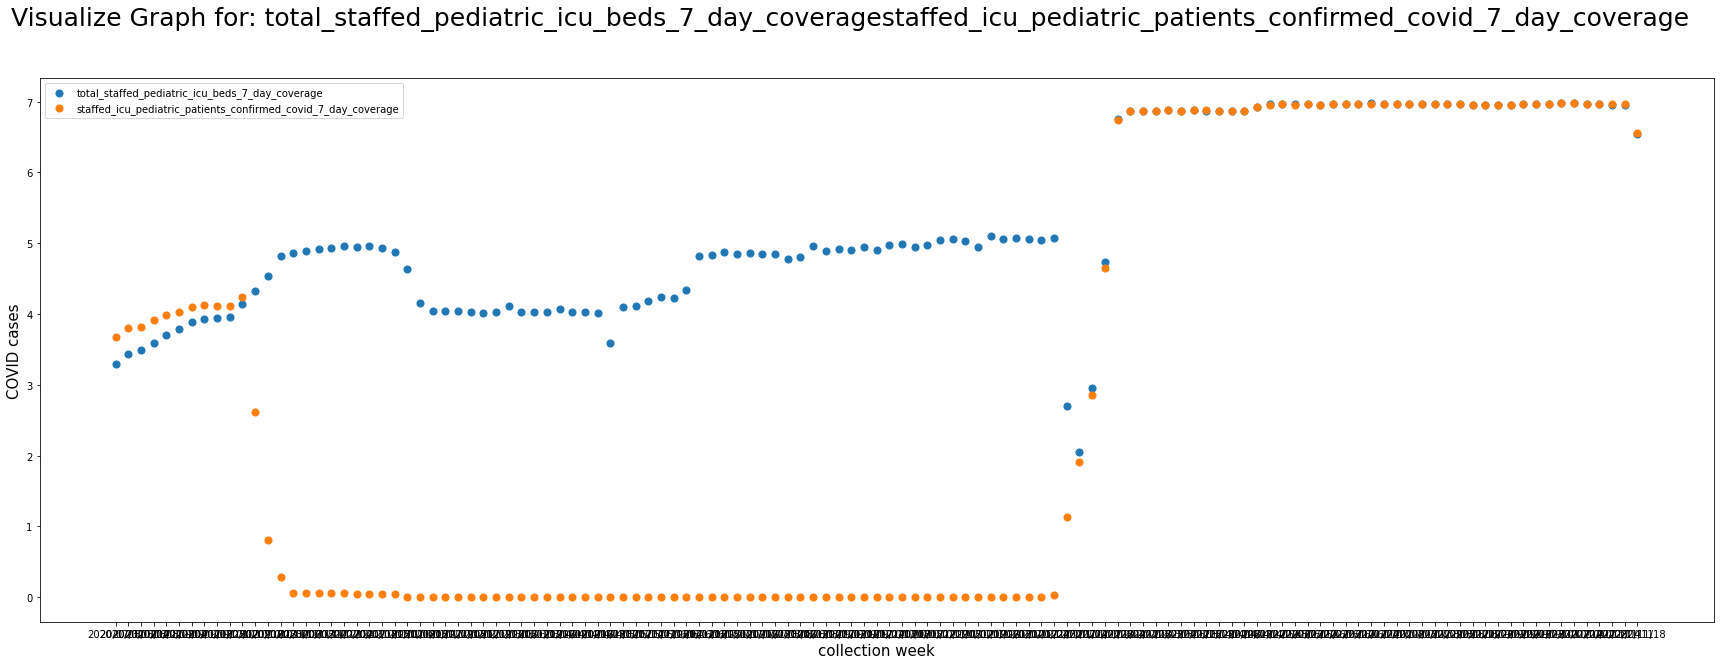

In [11]:
# Now we can also go through and create visualizations for the dataset for whichever of the datapoints we are interested in 


covid_data.visualizer(["total_staffed_pediatric_icu_beds_7_day_coverage", "staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage"])

## Data Cleaning 

Not every single variable in the dataset will be helpful or important for our analysis so it is important that we clean the data. Also, if we take a quick look at the database we can see that there are many columns and rows that have NaN values. Since this is real life data, our files are not perfect. There are values missing which may mean that we cannot use those hospitals for our analysis. Therefore, we need to do a thorough data cleaning before beginning the predictive modeling steps.

In [13]:
# Begin by dropping any hospitals that do not contain our target variable (the state the hospital is located in)
hospital = hospital.dropna()
# Check the new shape of the dataset
print(np.shape(hospital))

(42170, 127)


In [15]:
# Now lets set this as the target variable for the analysis
y = hospital["state"]

In [16]:
# And we will now drop the variables of x that we do not expect to have any impact on the analysis 
# We will drop strings that are not helpful for the work and also drop the target variable, so we are not cheating 

X = hospital[["total_beds_7_day_avg", "inpatient_beds_used_7_day_avg", "inpatient_beds_used_covid_7_day_avg", 
             "total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg", "staffed_icu_pediatric_patients_confirmed_covid_7_day_avg",
             "staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage", "total_staffed_pediatric_icu_beds_7_day_coverage"]]

X.head()

,total_beds_7_day_avg,inpatient_beds_used_7_day_avg,inpatient_beds_used_covid_7_day_avg,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg,staffed_icu_pediatric_patients_confirmed_covid_7_day_avg,staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage,total_staffed_pediatric_icu_beds_7_day_coverage
51,38.0,33.9,0.0,0.0,0.0,7,7
141,48.0,31.7,0.0,0.0,0.0,7,7
142,532.8,467.7,30.3,30.3,0.0,6,6
143,559.7,499.2,24.0,24.0,0.0,6,6
151,158.0,45.5,5.3,5.3,0.0,6,6


## Predictive Modeling -- Decision Trees

Now we are ready for the fun stuff! We have cleaned our data so that we can now work with it in Sklearn and try out several different models to see which one gives us the best predictions of the hospital's state.

We will begin by trying the simpliest form of categorization, the decision tree classifier

In [17]:
# Import the needed model
from sklearn import tree

# Create an instance of the classifier, here we will select a random max depth to begin
T = tree.DecisionTreeClassifier(max_depth=12)

In [18]:
# Now we must split our data into training and testing so that we have groups to test our model on

# To do this import the selection module 
from sklearn.model_selection import train_test_split

# Create the split, reserving 30% of data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Confirm this split worked by examining the training and testing shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(29519, 7) (12651, 7) (29519,) (12651,)


In [19]:
# Now lets train our model on the split data 
T2 = T.fit(X_train, y_train)

# Find the training score and then use the test data and get the score for that as well 
train_score = T2.score(X_train, y_train) 
test_score = T2.score(X_test, y_test)

print('train score:', train_score)
print('test score:', test_score)

train score: 0.5088587011755141
test score: 0.41601454430479806


### Decision Tree Discussion 

This original model did ok, a little bit better than random on the training dataset. But we want to see if we can improve the model without creating overfitting. To do this we should be a bit more systematic about the way we assign the max depth. To do this we will write a function that predicts the best depth to use (ie a depth that will maximize both the training and test score, while preventing overfitting) that comes with a visualizer to report back to the user.

Once we find the depth that we want to use, we need to go through the process of cross validation to get the mean score for the model

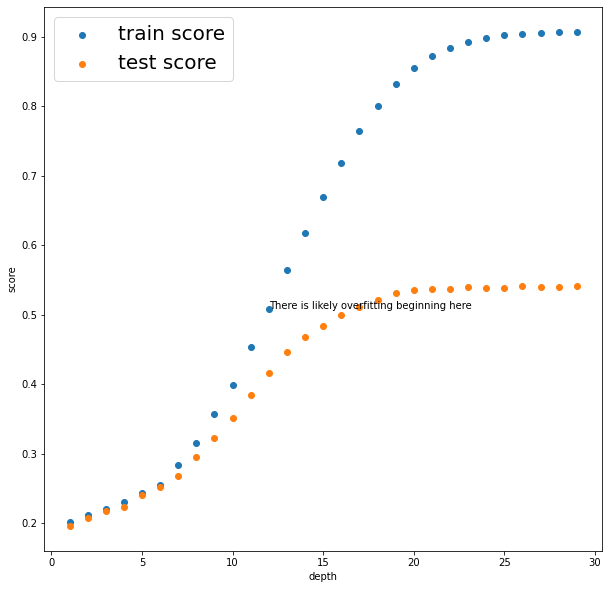

None


In [38]:
def tree_depth_finder(range_min, range_max, train_x, train_y, test_x, test_y):
    fig, ax = plt.subplots(1, figsize= (10, 10))
    depths = range(range_min, range_max)
    train_scores = []
    test_scores = []
    
    for d in depths:
        T = tree.DecisionTreeClassifier(max_depth=d) # create a model with that depth
        T2 = T.fit(X_train, y_train, d) # train the model 
        train_score = T2.score(X_train, y_train) # find the score for the training and testing
        test_score = T2.score(X_test, y_test)
    
        train_scores.append(train_score)
        test_scores.append(test_score)
        
        
        # This is somewhat subjective, but we will estimate the overfitting is likely when we have a difference 
        ## between the test and training scores that is larger than 1/4 of the score itself
        if ((train_score - test_score) > (0.20 *test_score))  &  ((train_score - test_score) < (0.25 *test_score)):
            ax.text(d, train_score, "There is likely overfitting beginning here")

    # Plot both the training and testing data for all of the depths so the user can see them 
    ax.scatter(depths, train_scores, label='train score')
    ax.scatter(depths, test_scores, label='test score')
    ax.set(xlabel="depth", ylabel= 'score')
    plt.legend(fontsize=20)
    plt.show()

print(tree_depth_finder(1,30, X_train, y_train, X_test, y_test))

# From here it seems that around 14 is the best depth so lets make our model with that 
T = tree.DecisionTreeClassifier(max_depth=14)

In [47]:
# Now go through the process of cross validation to find the mean score of the model 

# Begin by importing the modules needed 
from sklearn.model_selection import cross_val_score

# Do the cross validation
cv_scores = cross_val_score(T, X_train, y_train, cv=5) # 5-fold cross validation

# Find the mean score
mean_cv= cv_scores.mean()
print(mean_cv)


/Users/ceciliamccormick/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.4764057089156356


## Predictive Modeling -- Random Forests

But the decision tree model is just one of the many options that we have for predicting the state of the hospital. Lets try another method and see if we can improve our prediction. 

Again, we will try this model and see what we get for the cross validation

In [37]:
# Import the model from Sklearn
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Create an instance of the model, we will again begin with a random number of estimators (this is the depth of the model)
clf = RandomForestClassifier(n_estimators=5)

#Train the model and get the score on the test and training set 
clf = clf.fit(X_train, y_train)

clf_train_score = clf.score(X_train, y_train) 
clf_test_score = clf.score(X_test, y_test)

print('train score:', clf_train_score)
print('test score:', clf_test_score)

# Again there seems to be some pretty strong evidence of overfitting with this selected number of estimators 

train score: 0.8587350520004066
test score: 0.4224172002213264


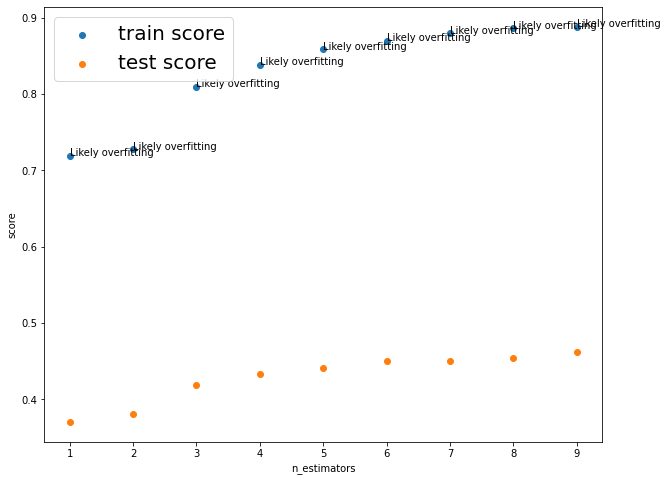

In [41]:
# Lets create similar function that we made for the tree to help us decide on the depth to use 
# In this case the depth is the number of trees in our forest 

def forest_depth_finder(n_min, n_max, train_x, train_y, test_x, test_y):
    fig, ax = plt.subplots(1, figsize= (10, 8))
    estimators = range(n_min, n_max)
    train_scores = []
    test_scores = []
    
    for e in estimators:
        clf = RandomForestClassifier(n_estimators= e) # make this the depth of the model 
        clf2 = clf.fit(X_train, y_train) #train the data 
        train_score = clf2.score(X_train, y_train) # score the data 
        test_score = clf2.score(X_test, y_test)
    
        train_scores.append(train_score)
        test_scores.append(test_score)
        
        # Then lets try to find a point in the data where we think there might be overfitting occuring
        if ((train_score - test_score) > (0.2 *test_score)):
            ax.text(e, train_score, "Likely overfitting")

    # plot the data
    ax.scatter(estimators, train_scores, label='train score')
    ax.scatter(estimators, test_scores, label='test score')
    ax.set(xlabel="n_estimators", ylabel= 'score')
    plt.legend(fontsize=20)
    plt.show()

forest_depth_finder(1,10, X_train, y_train, X_test, y_test)

#From this data is looks like there is not a big change in the chance of getting overfitting, so we will use n =5 still 

In [46]:
# Go through 5 fold cross validation to get the mean score 
clf_cv_scores = cross_val_score(clf, X_train, y_train, cv=5) # 5-fold cross validation

# Find the mean score
mean_clf = clf_cv_scores.mean()
print(mean_clf)

/Users/ceciliamccormick/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.425962752851313


## Predictive Modeling -- K Neighbors

So far we have not tried any clustering methods, lets see if we can use this K neighbors to make stronger predictions. Again we will find the average score of the model. 


In [43]:
# Import modules needed 
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Make the model instance
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)

# Train the model 
bagging.fit(X_train, y_train)

print(bagging.score(X_train, y_train))
print(bagging.score(X_test, y_test))


0.5666181103695924
0.42826654019445104


In [45]:
# Go through 5 fold cross validation to get the mean score 
bag_cv_scores = cross_val_score(bagging, X_train, y_train, cv=5) # 5-fold cross validation

# Find the mean score
mean_bag = bag_cv_scores.mean()
print(mean_bag)

/Users/ceciliamccormick/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.41020898151553087


In [48]:
# Before we do a thorough discussion of the models, lets print the average for each one 

print("The mean score for decision tree classifier: ", mean_cv)
print("The mean score for decision random forest classifier: ", mean_clf)
print("The mean score for decision k neighbors: ", mean_bag)

The mean score for decision tree classifier:  0.4764057089156356
The mean score for decision random forest classifier:  0.425962752851313
The mean score for decision k neighbors:  0.41020898151553087


## Final Discussion of our Results 

Overall, the decision tree was the strongest model for the classification of the state of a hospital given information about the number of covid patients in each ward. However, it is worth noting that none of the models we tried had a mean score higher than 50%. This may indicate that we predictor variables we are using for this analysis are simply not informative enough to make predictions about the state of a hospital. In the future we may consider changing the variables, or including more information as it becomes publically available.